# Predicting House Prices 

Nowadays, housing prices are extremely on the rise due to the increase in demand. It is really hard to get your hands on a house and even if you do, it has become normal to pay much more than the original sales price of the house.

When thinking about the sales price of a house, most people think this is a combination of the size of the lot, the amount of bedrooms and the location. However, many more unfamiliar features determine the sales price of a house. Given a dataset with 79 features, both a mixture of categorical and numerical features, we are going to estimate the value of houses in Ames Iowa. Since there are only 1460 training examples the challenge to train a model that generalizes well to new examples arises. Creating a model which predicts housing prices will help to solve real world problems because housing prices can in this way be computed in a more rational way. 

## Import the necessary modules and libraries

In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## Import data

In [13]:
train_data = pd.read_csv('train.csv')

## Inspect data

### Data information

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing values

In [20]:
def show_missing_info(df):
    
    '''This function detects missing values in a dataframe and returns a dataframe of features with missing
    values and the number of rows with and percentage of missing values within that feature in descending order.'''
    
    missing_info = df.isna().sum().reset_index(drop=False)
    missing_info.columns = ["column","rows"]
    missing_info["percentage missing"] = (missing_info["rows"]/train_data.shape[0])*100
    missing_info = missing_info[missing_info["rows"]>0].sort_values(by="percentage missing",ascending=False)
    return missing_info

# Show information about features with missing values in the train data
missing_df = show_missing_info(train_data)
print(f'Features with missing values: \n')
print(missing_df)

# Make a list of the top 5 features with the most missing values in the train data
all_missing = list(missing_df['column'])
top5 = list(missing_df['column'].head(5))


Features with missing values: 

          column  rows  percentage missing
72        PoolQC  1453           99.520548
74   MiscFeature  1406           96.301370
6          Alley  1369           93.767123
73         Fence  1179           80.753425
57   FireplaceQu   690           47.260274
3    LotFrontage   259           17.739726
58    GarageType    81            5.547945
59   GarageYrBlt    81            5.547945
60  GarageFinish    81            5.547945
63    GarageQual    81            5.547945
64    GarageCond    81            5.547945
32  BsmtExposure    38            2.602740
35  BsmtFinType2    38            2.602740
33  BsmtFinType1    37            2.534247
31      BsmtCond    37            2.534247
30      BsmtQual    37            2.534247
26    MasVnrArea     8            0.547945
25    MasVnrType     8            0.547945
42    Electrical     1            0.068493


### Visualize sale prices

/Users/veerleblom/opt/anaconda3/envs/progLab/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

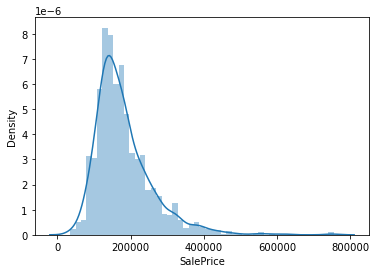

In [21]:
# Select the SalePrice (y) from the training data
X_train = train_data.loc[:, train_data.columns != 'SalePrice']
y_train = train_data['SalePrice']

# Create a histogram with seaborn of the SalePrice (y) from train data
sns.distplot(y_train)

As you can see in the plot, most of the houses are sold for a price between 100000 and 200000 dollars. However, there are outliers on the precier side.

### Visualize data correlations

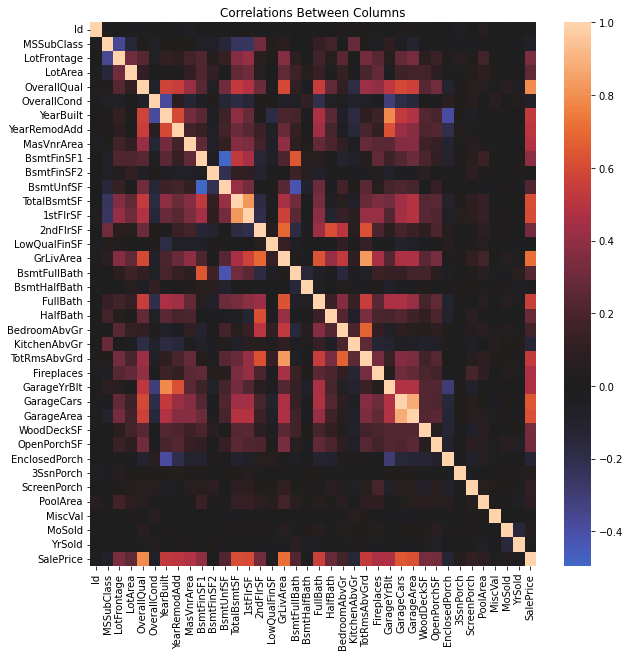

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data_cleaned.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

#### Compute correlation coefficients 

##### Degree of correlation:

- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/ 

In [9]:
# compute correlation coefficients
train_data_oh.corr(method="pearson")

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,Alley_0,Alley_1,Alley_2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning_0,1.000000,-0.017926,-0.008742,-0.160278,-0.034792,0.254287,-0.254287,-0.015638,0.086418,-0.047292,...,-0.022543,-0.000183,0.021926,-0.009668,-0.004278,-0.005708,-0.007287,-0.019116,0.024043,-0.047964
MSZoning_1,-0.017926,1.000000,-0.022722,-0.416608,-0.090435,-0.013866,0.013866,-0.040649,0.445741,-0.274031,...,0.056561,-0.009676,-0.025113,0.043199,0.015156,-0.014838,-0.009567,-0.031873,0.009966,-0.032360
MSZoning_2,-0.008742,-0.022722,1.000000,-0.203158,-0.044101,-0.006762,0.006762,-0.019822,0.061752,-0.027288,...,-0.009584,-0.042846,-0.001454,-0.012255,-0.014299,-0.007236,0.006947,-0.036889,0.014618,-0.034801
MSZoning_3,-0.160278,-0.416608,-0.203158,1.000000,-0.808585,-0.045348,0.045348,-0.234358,-0.267166,0.358875,...,-0.008500,0.023130,-0.016978,-0.031569,0.007643,-0.034485,0.017878,0.031360,-0.016384,0.033399
MSZoning_4,-0.034792,-0.090435,-0.044101,-0.808585,1.000000,0.003127,-0.003127,0.301534,0.010214,-0.233814,...,-0.014975,-0.008350,0.029341,0.016998,-0.012363,0.051544,-0.015296,-0.002294,0.003175,0.001716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,-0.005708,-0.014838,-0.007236,-0.034485,0.051544,-0.004416,0.004416,0.087768,-0.011684,-0.058041,...,0.074290,0.060780,0.054188,-0.007997,0.051296,1.000000,0.029665,-0.033742,-0.059683,0.092389
MiscVal,-0.007287,-0.009567,0.006947,0.017878,-0.015296,0.002998,-0.002998,0.006714,0.001803,-0.006283,...,-0.009328,-0.018565,0.018340,0.000347,0.031930,0.029665,1.000000,-0.006502,0.004915,-0.021216
MoSold,-0.019116,-0.031873,-0.036889,0.031360,-0.002294,0.008189,-0.008189,0.016573,-0.034067,0.010813,...,0.021625,0.071284,-0.028918,0.029465,0.023196,-0.033742,-0.006502,1.000000,-0.145712,0.046401
YrSold,0.024043,0.009966,0.014618,-0.016384,0.003175,0.000857,-0.000857,0.011968,0.001747,-0.010196,...,0.021982,-0.057652,-0.009882,0.018656,0.010720,-0.059683,0.004915,-0.145712,1.000000,-0.028884


In [10]:
# determine features with high correlations with the sale price
train_data_oh.corrwith(train_data_oh['SalePrice']).sort_values(ascending=False).head(15)


SalePrice       1.000000
OverallQual     0.790972
GrLivArea       0.708584
GarageCars      0.640383
GarageArea      0.623385
TotalBsmtSF     0.613792
1stFlrSF        0.605971
FullBath        0.560604
TotRmsAbvGrd    0.533682
YearBuilt       0.522877
YearRemodAdd    0.507015
MasVnrArea      0.475158
GarageYrBlt     0.470095
Fireplaces      0.466828
BsmtFinSF1      0.386783
dtype: float64

## Prepare data

We will make some adjustments in the data set in order to make the data useful as input to the model.

1. Clean data
    - Drop features that are in the top 5 features that include the most missing values
    - Replace other missing numerical data with the mean value of that feature
    - Replace other missing categorical data with the most common category of that feature)
2. One-hot encode categorical data
3. Ramdomly devide merged data set into 70% train data and 30% test data? --> validation?

In [ ]:
def one_hot_encoding(df):
    
    '''One hot encode categorical data from a dataframe.'''
        
    # Select all categorical features and numberical features
    cat_data = df.select_dtypes(include=[object])
    num_data = df.select_dtypes(exclude=[object])
    
    # Create a LabelEncoder object and apply it to each categorical feature in the data
    le = preprocessing.LabelEncoder()
    cat_data_2 = cat_data.apply(le.fit_transform)
    
    # Create an OneHotEncoder object and fit it to all categorical data
    enc = preprocessing.OneHotEncoder()
    enc.fit(cat_data_2)
    onehotlabels = enc.transform(cat_data_2).toarray()
    
    # Get all possible categories from the data
    all_categories = enc.get_feature_names(cat_data_2.columns)

    # Create new dataframe with all possible categories as columns
    cat_data = pd.DataFrame(onehotlabels, columns = all_categories)
    
    # Merge the numerical data with the one hot encoded categorical data again
    num_data = num_data.set_index('Id')
    result = pd.concat([cat_data, num_data], axis=1).reindex(cat_data.index)
        
    return result


In [ ]:
def cleaning(df):
    
    '''This function corrects any missing values in a pandas dataframe and
    returns the cleaned dataframe.'''
    
    # Loop through all the features/columns in the training data
    for column in df:
        
        # if column is in top 5 of columns with most missing data, drop column
        if column in top5:
            df.drop(columns=[column])
        
        # check whether the data in each column is numerical
        elif is_numeric_dtype(df[column]):

            # if the data is numerical compute the mean of the whole column values
            column_mean = df[column].mean()

            # replace the missing values in this column with the mean of the column
            df[column] = df[column].fillna(column_mean)

        # replace categorical missing values with the most common categorical value
        else:
            df[column] = df[column].fillna(df[column].value_counts().index[0])
    
    return df

# Clean and one hot encode data in dataframe
train_data_cleaned = cleaning(train_data)
train_data_oh = one_hot_encoding(train_data_cleaned)   


# BESLISSEN!
- FEATURES MET EEN/HOOG PERCENTAGE UIT SELECTEREN?
- FEATURES MET EEN LAGE/ZONDER CORRELATIE DESELECTEREN?

## Divide the data into a train and validation set


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_cleaned, y_train, test_size=0.2, random_state=42)


NameError: name 'X_train_cleaned' is not defined